   # FORDGOBIKE TripData
   ## by Abdallah Saoud

## Intro
**A marketing CEO at a bike company is looking to lanch a new service ...but did not know when to launch , where to lanch and what adjustments could be made to fit the largest group of your customers.** 

In order to know when to launch we will need to see which day is the **busiest day** 

and where to launch we will need to know the **busiest station** 
 
 as for the largest group we will be looking at **age , gender & user type**
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
pd.set_option('display.max_columns',None)

In [3]:
df = df.dropna()
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = 2021 - df.member_birth_year
df['duration_min'] = df.duration_sec / 60

### The most common age 

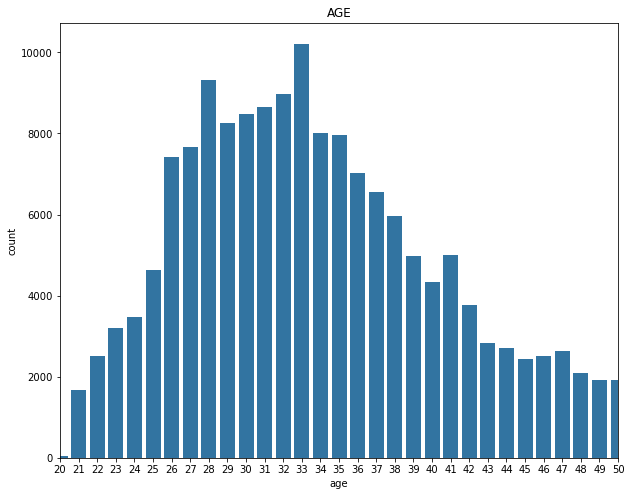

In [4]:
#looking at the most comon age of users
sb.countplot(data = df , x = 'age',color = sb.color_palette()[0]  );
fig = plt.gcf()
#making the grag larger so the data appears better.
fig.set_size_inches( 10, 8);
plt.xlim(0,30)
plt.title('AGE');

In [5]:
#dropping nan values 
df = df.dropna()
df['member_birth_year'] = df['member_birth_year'].astype(int)
#changing the 'member_birth_year' column type so we can make an age column 
df['age'] = 2021 - df.member_birth_year
#creating a column with duration in minuts so it would be easier to read
df['duration_min'] = df.duration_sec / 60

In [6]:
#in order to check the busiest day we would need to split the start time and the end time column as it contains date and time 
df['start_date'] = pd.to_datetime(df.start_time).dt.date
df['start_timing'] = pd.to_datetime(df.start_time).dt.time
df['end_date'] = pd.to_datetime(df.end_time).dt.date
df['end_timing'] = pd.to_datetime(df.end_time).dt.time

In [7]:
#changing their type into strings so we can easily iterate 
df['start_date'] = df.start_date.astype(str)
df['end_date'] = df.start_date.astype(str)

In [8]:
#spliting the start and end date columns to day , month and year to use them in plots easily
df[["s_year", "s_month", "s_day"]] = df["start_date"].str.split("-", expand = True)
df[["e_year", "e_month", "e_day"]] = df["end_date"].str.split("-", expand = True)


In [9]:
#Naming_weekdays
df['weekday'] = pd.to_datetime(df['start_date']).dt.day_name()


In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,start_date,start_timing,end_date,end_timing,s_year,s_month,s_day,e_year,e_month,e_day,weekday
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,869.750000,2019-02-28,17:32:10.145000,2019-02-28,08:01:55.975000,2019,02,28,2019,02,28,Thursday
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49,1030.900000,2019-02-28,12:13:13.218000,2019-02-28,05:24:08.146000,2019,02,28,2019,02,28,Thursday
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32,608.166667,2019-02-28,17:54:26.010000,2019-02-28,04:02:36.842000,2019,02,28,2019,02,28,Thursday
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47,26.416667,2019-02-28,23:54:18.549000,2019-02-28,00:20:44.074000,2019,02,28,2019,02,28,Thursday
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62,29.883333,2019-02-28,23:49:58.632000,2019-02-28,00:19:51.760000,2019,02,28,2019,02,28,Thursday


### checking the busiest day 

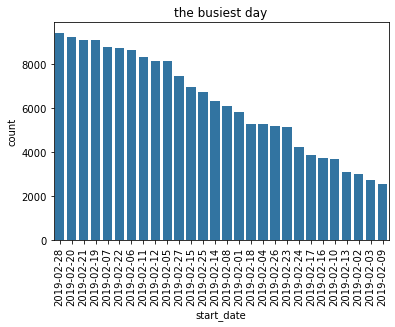

In [10]:
sb.countplot(data = df , x = 'start_date' ,
             color = sb.color_palette()[0] , 
             order = df.start_date.value_counts().index )
#orderd the data to get the busiest day
plt.xticks(rotation=90)
plt.title('the busiest day');

As we can see 28/02/2019 which is thursday is the busiest day 

### checking the busiest Station

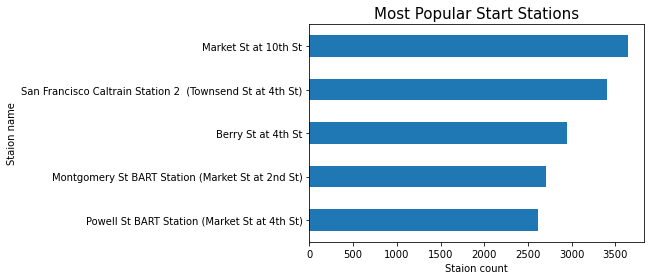

In [14]:
#finding the top 5 stations 
plt.title('Most Popular Start Stations', fontsize=15)
df.start_station_name.value_counts(ascending=True).tail(5).plot.barh()
plt.xlabel('Staion count')
plt.ylabel('Staion name');

#### Does gender affect trip duration ? 

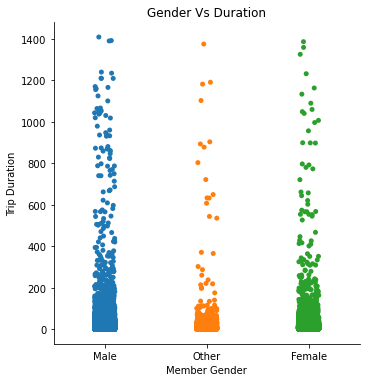

In [14]:
sb.catplot(x="member_gender", y="duration_min", data = df)
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration')
plt.title('Gender Vs Duration');


**Male users show more usage as you can see the first coulmn is more dense from the bottom up than the others.**

**And also we wanted to check if age elment affects trip duartion , so as you can see the density from 30 to 40, of course there are more users at thier 30s ride for long duration but as you can see amazingly there are some users at thier 60s for one of the longest durations**

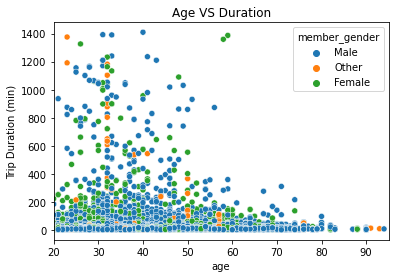

In [12]:
#classfing catagorical vakues and comparing age to duration to see if one gender dominates the longest duration 
sb.scatterplot(x="age", y="duration_min", data = df , hue = 'member_gender' )
plt.xlabel('age')
plt.ylabel('Trip Duration (min)')
plt.xlim(20,95)
plt.title ('Age VS Duration');

**Checking the busiest day of the week and by which gender**  

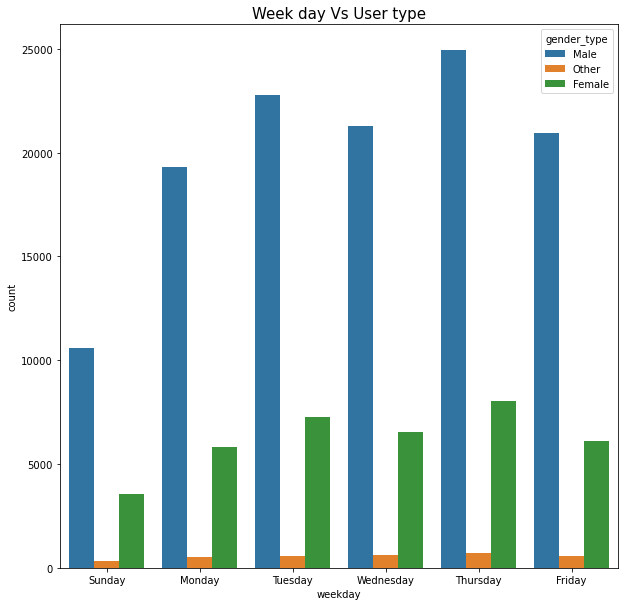

In [16]:
#checking week day with gender
gender_classes = ['Male', 'Female', 'Other']

# Returns the types for member_gender with the categories and orderednessb
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
df['gender_type'] = df['member_gender'].apply(lambda x:x.split()[0])
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
plt.figure(figsize = [10,10])
sb.countplot(data = df, x = 'weekday', hue = 'gender_type',order = day_order);
plt.title('Week day Vs User type',fontsize = 15);


> the busiest day of teh ewwk is thursday and mostly by male users 

# Multivariate Exploration

##### is there a certian day with more males than females and how long does they ride for ? 

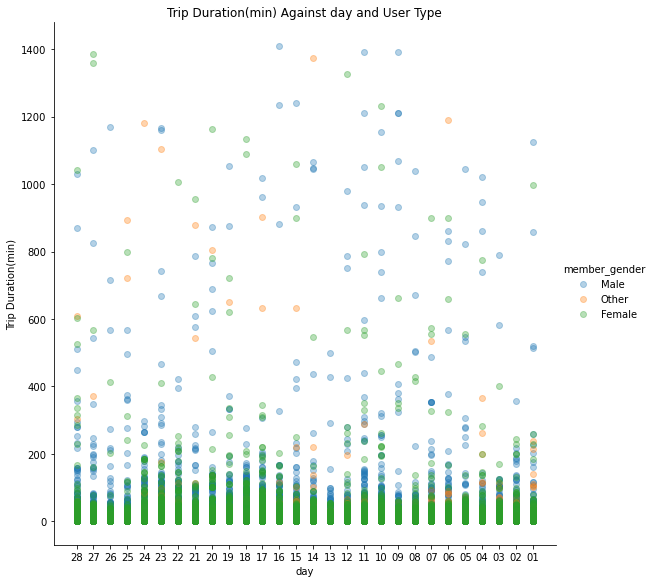

In [17]:
g = sb.FacetGrid(data =  df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 's_day','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against day and User Type')
plt.xlabel('day')
plt.ylabel('Trip Duration(min)');


longer trip durations everyday are mostly for male users 
unlike the shorter trip durations that are for women

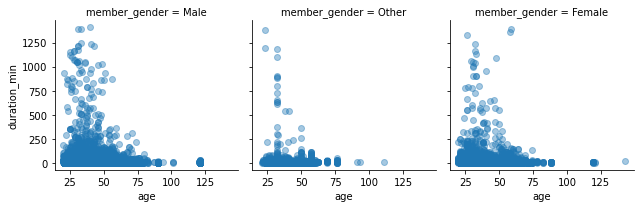

In [18]:
#checking user type with age and trip duration
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.scatter, 'age','duration_min',alpha = 2/5);


>- Majorty of users are male. Majorty of male user range from 25 to 50 years old .
>- Majorty of female user range from 25 to 45 years old .



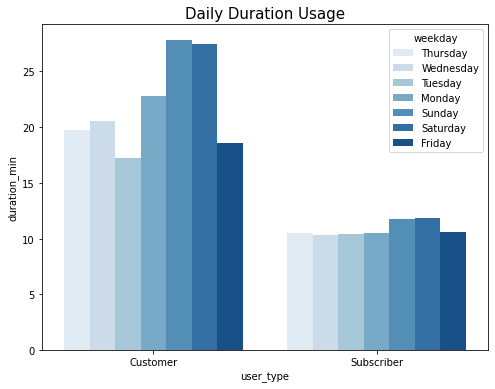

In [19]:
#checking user type with weekday and trip duration
plt.figure(figsize=(8,6))
plt.title('Daily Duration Usage', fontsize=15)
sb.barplot(data=df, x='user_type', y='duration_min', ci=None,hue='weekday',palette = 'Blues');


>- Trip duration for Subscriber is almost the same regarding week day.
>- Trip duration for customer is higher than subscriber especially in Saturday and Sunday.


In [ ]:
!jupyter nbconvert gofordbikeslides.ipynb --to slides --post serve --no-input --no-prompt